In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("hotel_bookings.csv")

In [95]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [96]:
df.shape         # col and row

(119390, 32)

In [97]:
df.isna().sum()   #missing data

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [98]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [99]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [100]:
list=['children','adults','babies']
for i in list:
        print(f"{i}has unique value as{df[i].unique()}")

childrenhas unique value as[ 0.  1.  2. 10.  3.]
adultshas unique value as[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babieshas unique value as[ 0  1  2 10  9]


In [101]:
filter = (df['children']==0)&(df['adults']==0)&(df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [102]:
pd.set_option('display.max_columns',32)

In [103]:
filter = (df['children']==0)&(df['adults']==0)&(df['babies']==0)
df[filter]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [104]:
data=df[~filter]
data
data.shape

(119210, 32)

In [105]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [106]:
contry_wise_data = data[data['is_canceled']==0]['country'].value_counts().reset_index()


In [107]:
contry_wise_data.columns=['country','no of guests']
contry_wise_data

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,NAM,1
162,SYC,1
163,AIA,1
164,MDG,1


In [108]:
# pip install folium

In [109]:
import folium
from folium.plugins import HeatMap

In [110]:
folium.Map()

In [111]:
base_map = folium.Map()
contry_wise_data .dtypes

country         object
no of guests     int64
dtype: object

In [112]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [113]:
import plotly.express as px

In [114]:
map_guest = px.choropleth(contry_wise_data,
                    locations=contry_wise_data['country'],
                    color=contry_wise_data['no of guests'], 
                    hover_name=contry_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()


In [115]:
## People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

In [116]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [117]:
data2 = data[data['is_canceled']==0]

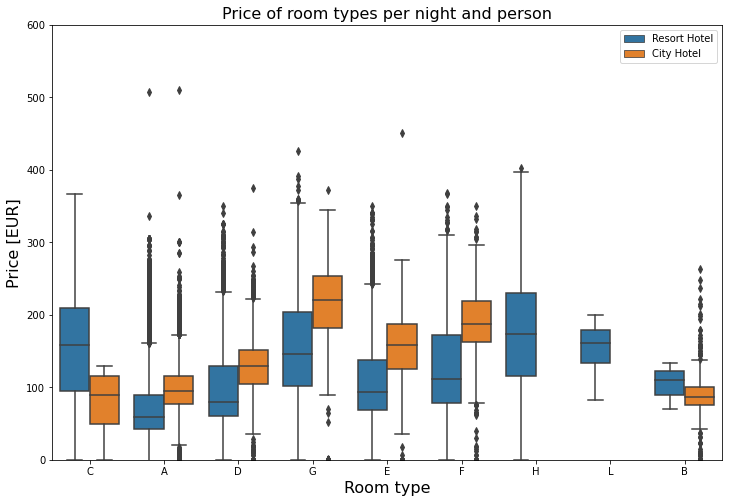

In [135]:
#boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

<!-- # This figure shows the average price per room, depending on its type and the standard deviation.
# Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

# problem statement -->

## how does the price per night vary the year?
  

In [136]:
data_resort = data[(data["hotel"]=="Resort Hotel") & (data["is_canceled"]==0)]
data_city = data[(data["hotel"]=="City Hotel") & (data["is_canceled"]==0)]

In [137]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [138]:
resort_data=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_data

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [139]:
city_data=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_data

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [140]:
final = resort_data.merge(city_data,on = 'arrival_date_month')
final.columns = ['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


# # now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion so very first we have to provide right hierarchy to the month column

In [141]:
# pip install sorted-months-weekdays

In [142]:
# pip install sort-dataframeby-monthorweek

In [143]:
 import sort_dataframeby_monthorweek as sd

In [144]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)

In [145]:
final = sort_data(final,'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [178]:
import plotly.express as px
px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Room price per night over the Months')


In [131]:
### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).
# , The price of the city hotel varies less and is most expensive during spring and autumn.

# Which are the most busy month or in which months Guests are high?
<!--    anylysing demand of hotels -->

In [150]:
 data_resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [152]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [153]:
 rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [158]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guest in resort','no of guest in city']
final_rush

,month,no of guest in resort,no of guest in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [186]:
final_rush = sort_data(final_rush,'month')
final_rush

,month,no of guest in resort,no of guest in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [187]:
final_rush.columns

Index(['month', 'no of guest in resort', 'no of guest in city'], dtype='object')

In [188]:
final_rush.dtypes

month                    object
no of guest in resort     int64
no of guest in city       int64
dtype: object

In [190]:
import plotly.express as px
px.line(data_frame=final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'], title='Total no of guests per Months')

ValueError: All arguments should have the same length. The length of argument `y` is 2, whereas the length of  previously-processed arguments ['month'] is 12

SyntaxError: invalid syntax (<ipython-input-195-4033329a4c4f>, line 1)